In [1]:
%load_ext rpy2.ipython

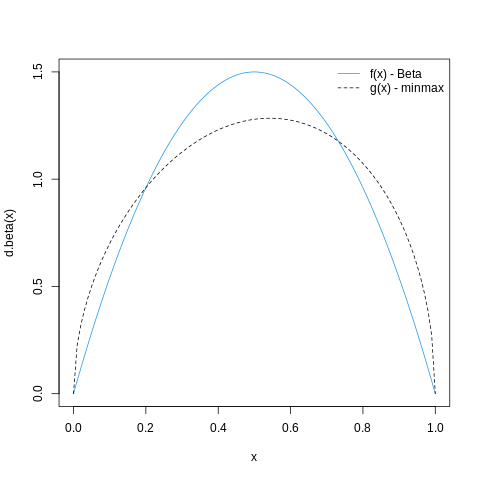

In [42]:
%%R
# Considere que deseja-se gerar valores de uma distribuição Beta(2,2)
#  Queremos amostrar de uma Distribuição Minimax(1.5,1.5)

alfa = 2
beta = 2
d.beta = function(x){(gamma(alfa+beta)*x^(alfa-1)*((1-x)^(beta-1)))/(gamma(alfa)*gamma(beta))}


teta = 1.5
gama = 1.5
d.minmax = function(x){teta*gama*x^{teta-1}*(1-x^teta)^{gama-1}}
r.minmax = function(x){  (1-(1-runif(x))^(1/gama))^(1/teta)}


# curvas
curve(d.beta(x), from = 0, to = 1, col = 4, ylim = c(0, 1.5))
curve(d.minmax(x), from = 0, to = 1, add = TRUE, lty = 2)
legend("topright", legend = c("f(x) - Beta", "g(x) - minmax"),
       lty = c(1, 2), col = c(4, 1), bty = "n")

In [3]:
%%R
(M <- optimize(f = function(x) {d.beta(x)/d.minmax(x)},
               interval = c(0, 1), maximum = TRUE)$objective)
M

[1] 1.17755


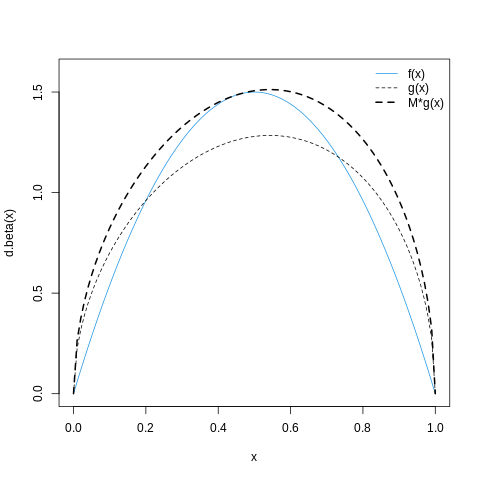

In [4]:
%%R
curve(d.beta(x), from = 0, to = 1, col = 4, ylim = c(0, 1.6))
curve(d.minmax(x), from = 0, to = 1, add = TRUE, lty = 2)
curve(M*d.minmax(x), add = TRUE, lty = 2, lwd = 2)
legend("topright", legend = c("f(x)", "g(x)", "M*g(x)"),
       lty = c(1, 2, 2), col = c(4, 1, 1), lwd = c(1, 1, 2), bty = "n")

In [5]:
%%R
## Define funções
f <- function(x) d.beta(x)
g <- function(x) d.minmax(x)

## Simula
Nsim <- 1000000
## Amostra da proposta
y <- r.minmax(Nsim)
## Amostra da U(0,1)
u <- runif(Nsim)
r <- f(y)/(M * g(y))
x <- y[u < r]
ua <- u[u < r]
ur <- u[u >= r]


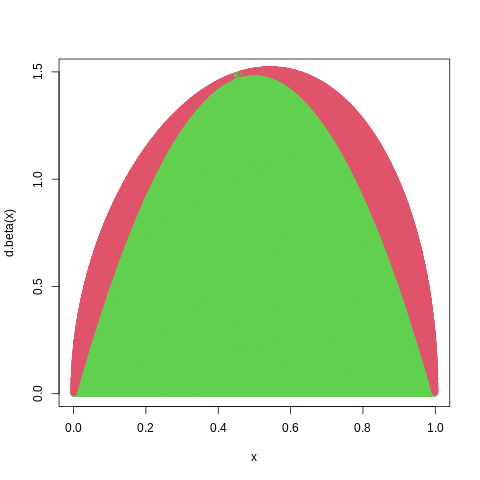

In [6]:
%%R
# pontos amostrados que foram aceitados (verde) e aqueles rejeitados (vermelho)
curve(d.beta(x), from = 0, to = 1, col = 4)
curve(M*d.minmax(x), from = 0, to = 1, add = TRUE, lty = 2, lwd = 2)
points(x, ua * M * g(x), col = 3)
points(y[u >= r], ur * M * g(y[u >= r]), col = 2)

In [7]:
%%R
## Quantos foram aceitados
length(x)/length(y)

[1] 0.849109


In [8]:
%%R
## Taxa (teorica) de aceitacao é
1/M

[1] 0.8492206


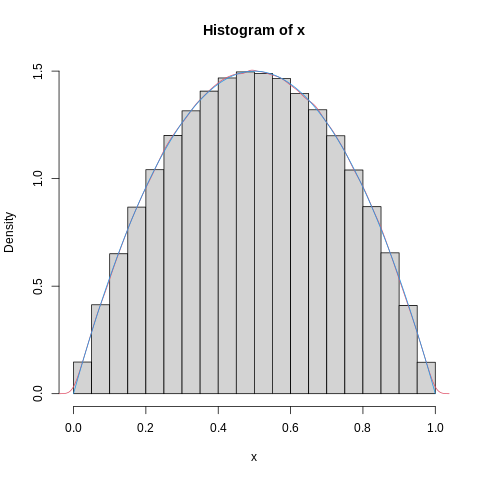

In [9]:
# Gráficos
%%R
hist(x, freq = FALSE); lines(density(x), col = 2)
curve(d.beta(x), add = TRUE, from = 0, to = 1, col = 4)

###############################################################################

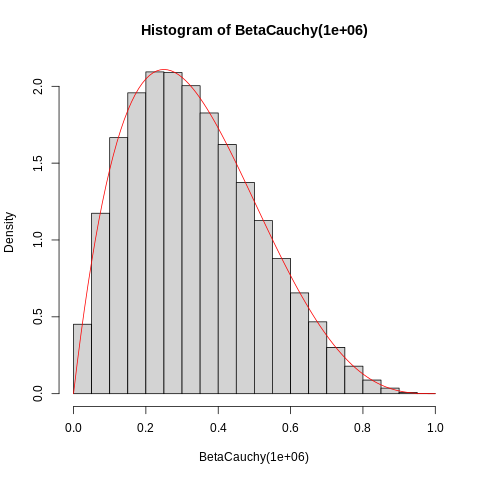

In [10]:
# Utilizando a dcauchy como distribuição proposta para obter a Beta(2,4)
%%R
alfa = 2
beta = 4
d.beta = function(x){(gamma(alfa+beta)*x^(alfa-1)*((1-x)^(beta-1)))/(gamma(alfa)*gamma(beta))}

BetaCauchy  <- function(n){
  X = numeric(n)
  M = 7.1
  for(i in 1:n){
    Y = tan(pi*(runif(1)-1/2))
    while( runif(1) > d.beta(Y)/(M*dcauchy(Y))){
      Y = tan(pi*(runif(1)-1/2))
    }
    X[i] = Y
  }
  X
}
hist(BetaCauchy(1000000), 30, prob = T)
curve(d.beta(x), add = T, col = "red")

In [11]:
%%R
trabalho  <- function(n){
  X = numeric(n)
  M = 7.1
  for(i in 1:n){
    Y = tan(pi*(runif(1)-1/2))
    while( runif(1) > dbeta(Y,2,4)/(M*dcauchy(Y))){
      Y = tan(pi*(runif(1)-1/2))
    }
    X[i] = Y
  }
  X
}

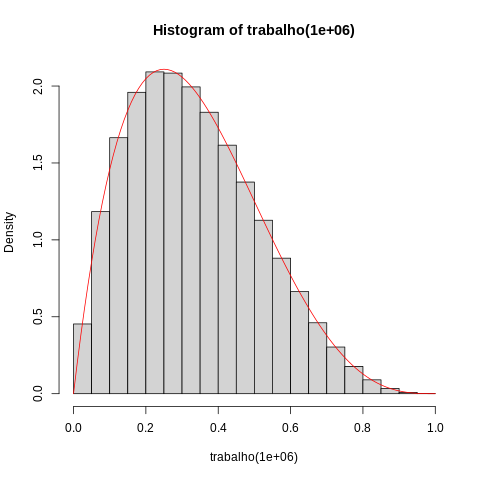

In [12]:
%%R
hist(trabalho(1000000), 30, prob = T)
curve(dbeta(x,2,4), add = T, col = "red")

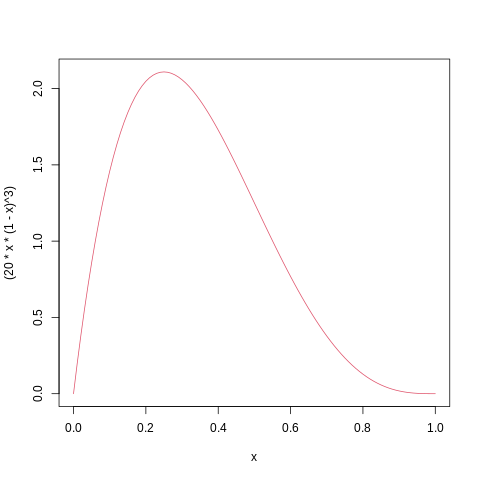

In [13]:
%%R
# para alfa=2 e beta=4, temos:
# # Gráfico da f.d.p da v.a. X, f(x).
curve((20*x*(1-x)**3), 0, 1, col = 2)



[1] "u < r então valor aceito."


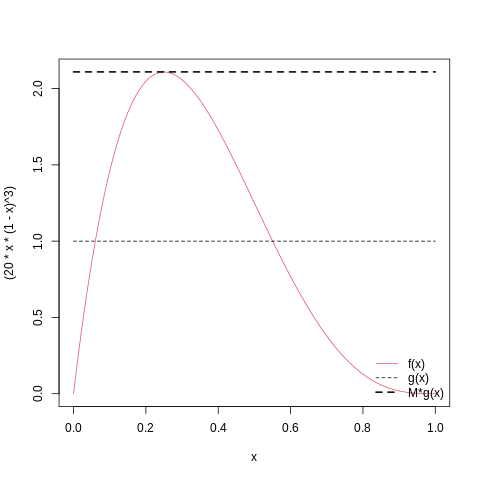

In [14]:
%%R
# para alfa=2 e beta=4, temos:
# # Gráfico da f.d.p da v.a. X, f(x).
curve((20*x*(1-x)**3), 0, 1, col = 2)

# Tem integral 1?
integrate(function(x) (20*x*(1-x)**3), lower = 0, upper = 1)

# ADOTANDO g(x) = 1 como distribuição proposta
curve(1 + 0 * x, add = TRUE, lty = 2)

# f(x) <= M*g(x)
# M = 2.1094

curve(2.1094 * 1 + 0 * x, add = TRUE, lty = 2, lwd = 2)



legend("bottomright",
       legend = c("f(x)", "g(x)", "M*g(x)"),
       lty = c(1, 2, 2),
       col = c(2, 1, 1),
       lwd = c(1, 1, 2),
       bty = "n")

# Criando os elementos necessários.
f <- function(x) 20*x*(1-x)*3
g <- function(x) 1 + 0*x
M <- 2.1094
x <- NULL

# 1. Gerar y cuja densidade é g()
x <- runif(n = 1, 0, 1)
x

# 2. Gerar u de uma uniforme padrão.
u <- runif(n = 1)
u

# 3. Comparar e decidir.
r <- f(x)/(M * g(x))
r

if (u < r) {
  x <- x
  print("u < r então valor aceito.")
} else {
  print("u >= r então valor descartado.")
}

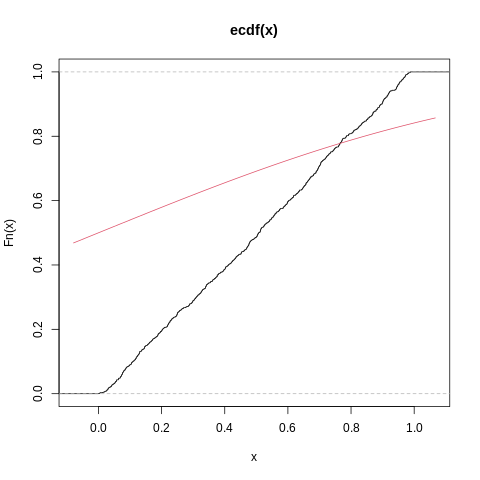

In [15]:
%%R

# Aplicar dentro de um laço condicional para obter N valores.

n <- 1   # Contador de valores aceitos.
l <- 1   # Contador de ciclos.
N <- 999 # Total de número à gerar.

# Vetor vazio.
# x <- vector(mode = "numeric", length = N)
x <- numeric(N)

while (n < N) {
    y <- runif(n = 1)
    u <- runif(n = 1)
    w <- f(y)/(M * g(y))
    if (u < w) {
        x[n] <- y
        n <- n + 1
    }
    l <- l + 1
}

plot(ecdf(x))
curve(pnorm(x), add = TRUE, col = 2)

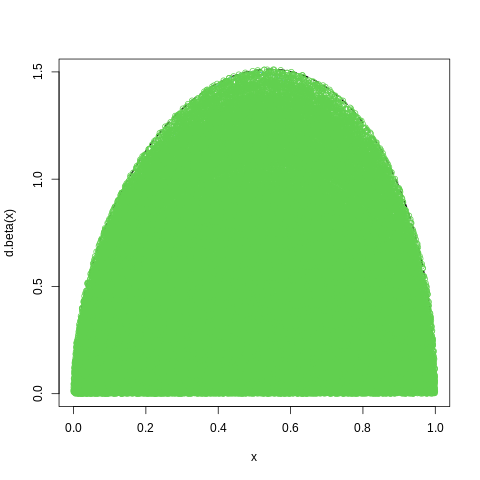

In [43]:
# pontos amostrados que foram aceitados (verde) e aqueles rejeitados (vermelho)
%%R
curve(d.beta(x), from = 0, to = 1, col = 4)
curve(M*d.minmax(x), from = 0, to = 1, add = TRUE, lty = 2, lwd = 2)
points(x, ua * M * g(x), col = 3)
points(y[u >= r], ur * M * g(y[u >= r]), col = 2)

In [19]:
%%R
beta_minimax  <- function(n){
  X = numeric(n)
  M = 1.17755
  for(i in 1:n){
    Y = (1-(1-runif(n))^(1/1.5))^(1/1.5)
    while( runif(1) > 6*Y*(1-Y)/(M*2.25*(Y^0.5)*((1-Y^1.5)^(0.5)))){
      Y = (1-(1-runif(n))^(1/1.5))^(1/1.5)
    }
    X[i] = Y
  }
  X
}


In [20]:
%%R
hist(beta_minimax(1000), 30, prob = T)

  the condition has length > 1




Error in while (runif(1) > 6 * Y * (1 - Y)/(M * 2.25 * (Y^0.5) * ((1 -  : 
  the condition has length > 1


In [21]:
%%R
curve(dbeta, add = T, col = "red")


Error in dbeta(x) : argument "shape1" is missing, with no default


In [22]:
%%R
beta = 2
alfa = 2
d.beta = function(x, beta, alfa){
  (gamma(beta+alfa)*(x^(beta-1))*((1-x)^(alfa-1)))/(gamma(beta)*gamma(alfa))
}

teta = 1.5
gama = 1.5
d.max = function(x, teta, gama){
  teta*gama*x^{teta-1}*(1-x^teta)^{gama-1}
}

In [23]:
%%R
(M <- optimize(f = function(x) {d.beta(x, beta, alfa)/d.max(x, teta, gama)},
               interval = c(0, 1), maximum = TRUE)$objective)

[1] 1.17755


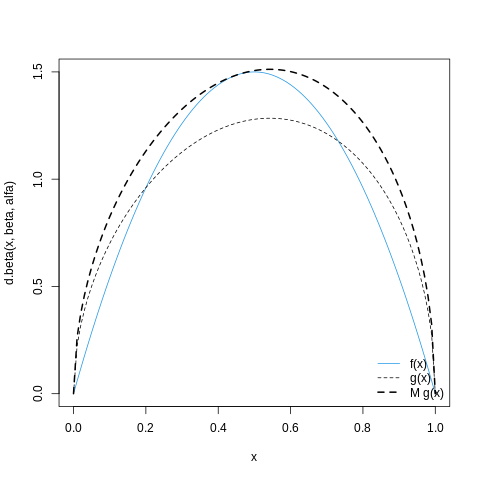

In [24]:
%%R
# curvas
curve(d.beta(x, beta, alfa), from = 0, to = 1, col = 4, ylim = c(0, 1.5))
curve(d.max(x, teta, gama), from = 0, to = 1, add = TRUE, lty = 2)
curve(M*d.max(x, teta, gama), add = TRUE, lty = 2, lwd = 2)
legend("bottomright", legend = c("f(x)", "g(x)", "M g(x)"),
       lty = c(1, 2, 2), col = c(4, 1, 1), lwd = c(1, 1, 2), bty = "n")

In [25]:
%%R
## Criando os elementos necessários.

f <- function(x){6*x*(1-x)}

g <- function(x){2.25*(x^0.5)*((1-x^1.5)^(0.5))}

M <- 1.17755
x <- NULL

## 1. Gerar y cuja densidade é g()
set.seed(1)
(y <- runif(n = 1, 0, 1))

## 2. Gerar u de uma uniforme padrão.
(u <- runif(n = 1))

## 3. Calcula a razão entre as densidades
(r <- f(y)/(M * g(y)))

[1] 0.9224912


In [26]:
%%R
## 4. Compara e decide
if (u < r) {
  x <- y
  print("u < r então valor aceito.")
} else {
  print("u >= r então valor descartado.")
}

[1] "u < r então valor aceito."


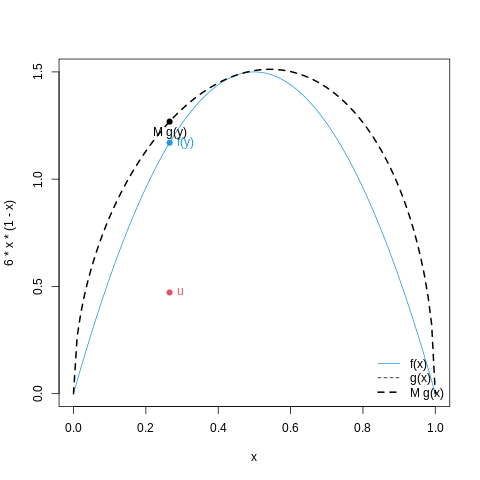

In [27]:
%%R
# Verifica os pontos no gráfico:

curve(6*x*(1-x), 0, 1, col = 4)
curve(M*2.25*(x^0.5)*((1-x^1.5)^(0.5)), add = TRUE, lty = 2, lwd = 2)
legend("bottomright", legend = c("f(x)", "g(x)", "M g(x)"),
       lty = c(1, 2, 2), col = c(4, 1, 1), lwd = c(1, 1, 2), bty = "n")
points(y, f(y), pch = 19, col = 4)
text(y, f(y), "f(y)", pos = 4, col = 4)
points(y, M * g(y), pch = 19, col = 1)
text(y, M * g(y), "M g(y)", pos = 1, col = 1)
points(y, u * M * g(y), pch = 19, col = 2)
text(y, u * M * g(y), "u", pos = 4, col = 2)

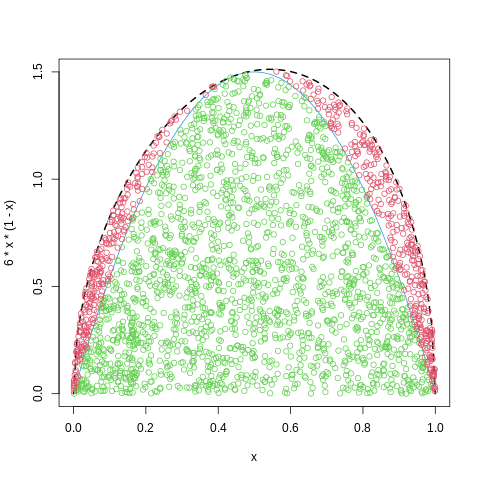

In [28]:
%%R
# Agora, podemos definir um algoritmo que repete esse processo para um número fixo de amostras da distribuição proposta.
## Simula de uma única vez, com um valor fixo de simulações
Nsim <- 2500
set.seed(1)
## Amostra da proposta
y <- runif(Nsim, 0, 1)
## Amostra da U(0,1)
u <- runif(Nsim)
## Calcula a razão
r <- f(y)/(M * g(y))
## x será um vetor com os valores de y onde u < r
x <- y[u < r]
## Valores de u aceitos (apenas para o grafico)
ua <- u[u < r]
## Valores de u rejeitados (apenas para o grafico)
ur <- u[u >= r]

curve(6*x*(1-x), 0, 1, col = 4)
curve(M*2.25*(x^0.5)*((1-x^1.5)^(0.5)), add = TRUE, lty = 2, lwd = 2)
points(x, ua * M * g(x), col = 3)
points(y[u >= r], ur * M * g(y[u >= r]), col = 2)

In [29]:
%%R
## Quantos foram aceitados
length(x)/length(y)

[1] 0.7732


In [30]:
%%R
## Taxa (teorica) de aceitacao é
1/M

[1] 0.8492208


In [31]:
%%R
## Quantos foram rejeitados
length(ur)/length(u)

[1] 0.2268


In [32]:
%%R
## Simula 1000 valores de f
N <- 100000L
x <- numeric(0)
while(length(x) < N) {
  y <- runif(1, 0, 1)
  u <- runif(1)
  r <- f(y)/(M * g(y))
  if(u < r) {
    x <- c(x, y)
  }
}
length(x)

[1] 100000


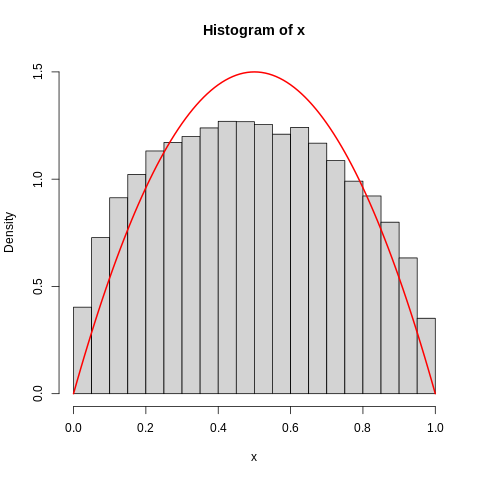

In [33]:
%%R
# Podemos então verificar se a simulação gerou de fato valores de f através de um histograma
hist(x, 30, prob = T, ylim = c(0, 1.5))
curve(6*x*(1-x), add = T, col = "red", lwd = 2)